## Import Library Yang Dibutuhkan 

In [1]:
#pip install wordcloud

In [2]:
#pip install --upgrade pip

In [3]:
#pip install --upgrade Pillow

In [55]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import TweetTokenizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Mengambil Data 

In [56]:
data = pd.read_csv("datakomentaryoutube.csv", encoding='utf-8') #memanggil data
data #menampilkan data

text    LABEL
0                                        Dajjal ini bro  NEGATIF
1     Bill Gates Sindir NFT: Ketika Duit Ditambang d...  NEGATIF
2     Gua lebih percaya pikiran gua sendiri bahwa su...  NEGATIF
3     Gua rasa rumah di metaverse dan beranda profil...  POSITIF
4     Ini adalah alasan saya klo mempunyai sedikit k...  NEGATIF
...                                                 ...      ...
1528                      Nama akunya sangat menghayati  NEGATIF
1529  Santai aja bruh..\r\nItu yg pada ngejek di ata...  NEGATIF
1530      Alat kenikmatan utk tititnya blom di ciptakan  NEGATIF
1531    Yang gw bayangin malah SAO dunianya kaya SAO :v  POSITIF
1532                                      stadium akhir  NEGATIF

[1533 rows x 2 columns]

In [57]:
data.isna().sum() #melihat missing value

text     0
LABEL    0
dtype: int64

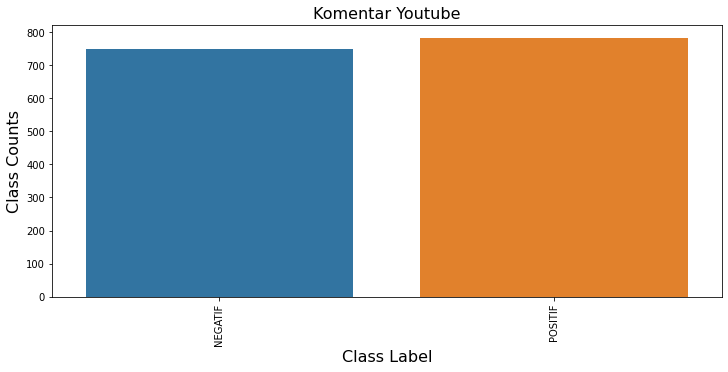

In [58]:
# Cek jumlah review positive dan negative
plt.figure(figsize=(12,5))
sns.countplot(x='LABEL', data=data)
plt.title('Komentar Youtube', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

In [59]:
text = data.text[11]
wordcloud = WordCloud().generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Preprocessing Data 

In [60]:
#proses casefolding mengubah data uppercase menjadi lower case
def casefolding (text):
    text = text.lower()
    text = text.strip(" ")
    text = re.sub(r' [?|$|.|!2_:")(-+,]', ' ', text)
    return text

data['lowercase'] = data['text'].apply(casefolding) #membuat kolom baru dengan nama kolom lowercase untuk hasil casefolding
data #menampilkan data
#print (data['text'][0])

text    LABEL  \
0                                        Dajjal ini bro  NEGATIF   
1     Bill Gates Sindir NFT: Ketika Duit Ditambang d...  NEGATIF   
2     Gua lebih percaya pikiran gua sendiri bahwa su...  NEGATIF   
3     Gua rasa rumah di metaverse dan beranda profil...  POSITIF   
4     Ini adalah alasan saya klo mempunyai sedikit k...  NEGATIF   
...                                                 ...      ...   
1528                      Nama akunya sangat menghayati  NEGATIF   
1529  Santai aja bruh..\r\nItu yg pada ngejek di ata...  NEGATIF   
1530      Alat kenikmatan utk tititnya blom di ciptakan  NEGATIF   
1531    Yang gw bayangin malah SAO dunianya kaya SAO :v  POSITIF   
1532                                      stadium akhir  NEGATIF   

                                              lowercase  
0                                        dajjal ini bro  
1     bill gates sindir nft: ketika duit ditambang d...  
2     gua lebih percaya pikiran gua sendiri bahwa su...  
3     gua rasa rumah di metaverse dan beranda profil...  
4     ini adalah alasan saya klo mempunyai sedikit k...  
...                                                 ...  
1528                      nama akunya sangat menghayati  
1529  santai aja bruh..\r\nitu yg pada ngejek di ata...  
1530      alat kenikmatan utk tititnya blom di ciptakan  
1531     yang gw bayangin malah sao dunianya kaya sao v  
1532                                      stadium akhir  

[1533 rows x 3 columns]

In [61]:
#menghapus mention, hastag, link, font karakter, double spasi, enter, tab dll
def remove(text):
    text = re.sub('[0-9]+', ' ', text) #remove angka 
    text = re.sub(r'\$\w*', ' ', text)  # remove stock market tickers like $GE
    text = re.sub(r'^RT[\s]+', ' ', text) # remove old style retweet text "RT"
    text = re.sub(r',',' ',text) # remove koma 
    text = re.sub(r'#[\w]*', ' ', text) # remove hashtags (only removing the hash # sign from the word)
    text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text) #remove hyperlink
    text = re.sub(r'@[\w]*', ' ', text) #remove mention @
    text = re.sub(r'  ', ' ', text) #remove doublespasi
    text = re.sub(r'   ', ' ', text) #remove triplespasi
    text = re.sub(r'    ', ' ', text)
    text = re.sub(r'\n+', ' ', text) #remove enter
    text = re.sub(r'\n', ' ', text) #remove enter
    text = re.sub(r'\t', ' ', text) #remove tab
    text = re.sub(r'\t\t\t', ' ', text) #remove tab
    text = re.sub(r'[?|$|.|!_:")(-+,€¦=;}{~`â™§‡†ðÿ’ªðÿ™¬ï¼‰š\?><ðŸ’‰˜ž‘“.&-]', ' ', text) #remove karakter
    text = text.encode('ascii', 'replace').decode('ascii')
    text = re.sub(r'·+', ' ', text)
    text = re.sub(r'aan', ' ', text)
    text = re.sub(r'atau', ' ', text)
    return text

data['remove'] = data['lowercase'].apply(lambda x: remove(x)) #membuat kolom baru dengan nama remove untuk hasil remove
data

text    LABEL  \
0                                        Dajjal ini bro  NEGATIF   
1     Bill Gates Sindir NFT: Ketika Duit Ditambang d...  NEGATIF   
2     Gua lebih percaya pikiran gua sendiri bahwa su...  NEGATIF   
3     Gua rasa rumah di metaverse dan beranda profil...  POSITIF   
4     Ini adalah alasan saya klo mempunyai sedikit k...  NEGATIF   
...                                                 ...      ...   
1528                      Nama akunya sangat menghayati  NEGATIF   
1529  Santai aja bruh..\r\nItu yg pada ngejek di ata...  NEGATIF   
1530      Alat kenikmatan utk tititnya blom di ciptakan  NEGATIF   
1531    Yang gw bayangin malah SAO dunianya kaya SAO :v  POSITIF   
1532                                      stadium akhir  NEGATIF   

                                              lowercase  \
0                                        dajjal ini bro   
1     bill gates sindir nft: ketika duit ditambang d...   
2     gua lebih percaya pikiran gua sendiri bahwa su...   
3     gua rasa rumah di metaverse dan beranda profil...   
4     ini adalah alasan saya klo mempunyai sedikit k...   
...                                                 ...   
1528                      nama akunya sangat menghayati   
1529  santai aja bruh..\r\nitu yg pada ngejek di ata...   
1530      alat kenikmatan utk tititnya blom di ciptakan   
1531     yang gw bayangin malah sao dunianya kaya sao v   
1532                                      stadium akhir   

                                                 remove  
0                                        dajjal ini bro  
1     bill gates sindir nft  ketika duit ditambang d...  
2     gua lebih percaya pikiran gua sendiri bahwa su...  
3     gua rasa rumah di metaverse dan beranda profil...  
4     ini adalah alasan saya klo mempunyai sedikit k...  
...                                                 ...  
1528                      nama akunya sangat menghayati  
1529  santai aja bruh  \r itu yg pada ngejek di atas...  
1530      alat kenikmatan utk tititnya blom di ciptakan  
1531     yang gw bayangin malah sao dunianya kaya sao v  
1532                                      stadium akhir  

[1533 rows x 4 columns]

In [62]:
from nltk.corpus import stopwords 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stopwords_indonesia = stopwords.words('indonesian')
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

# Tertawa, double huruf dan huruf tunggal
emoticons_sad = set(['haha', 'hahaha', 'hahahaha', 'hahahahahaha', 'ahahaha', 'ahaa', 'kwkwkwkwk', 'kwkwk',
                    'kwkwkwkkkk', 'awkwkwkwk', 'awkwkwkwkkk', 'aawkawkawkkwakawkwa', 'wkwkw', 'akakakka', 'aaa', 
                    'aa', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
                    's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai',
                    'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av', 'aw', 'ax', 'ay', 'az',
                     'aan','aap', 'bb', 'bc', 'oh', 'ni','ooh', 'ooo', 'oooh', 'adl', 'adlah', 'adlh','aing', 'aja',
                     'ajah', 'ajalah','ajg', 'ajh','akhirnyaaa','anjay', 'anjim', 'anjime', 'anjir', 'anjirr', 'anjj',
                     'apaa', 'apalah', 'apalgi', 'apanya', 'apapun', 'apasi', 'api', 'apkah', 'aplgi','asu','ayang',
                     'ayangan','ato', 'atr', 'atuh','ayuu','bah', 'bahagian','bahakan','bahayanya','bales',
                     'baperan','batasin', 'baw','baymax','bcil', 'bdn', 'be', 'becus','bedian', 'bego',
                     'behavior', 'being', 'belike', 'beljar', 'belo', 'beneran', 'benernya', 'bengkel', 'bensin',
                     'ber', 'bersri','betulll', 'bg', 'bgt', 'bgus', 'bhs', 'bia','bilaik','bin','bj', 'bkal',
                     'bkin', 'bklan','bkn', 'bla', 'blablabla', 'blank', 'blh', 'blm', 'blom', 'blum',
                     'bnb', 'bner', 'bnget', 'bngt', 'bngung', 'bnyak', 'bnyk', 'bo', 'bocil','bok',
                     'brang', 'brarti', 'brati', 'brg', 'brgerak', 'brgkt', 'brharap', 'brlaku', 'brnma',
                     'bro', 'brok', 'broo', 'broott', 'broottt', 'brotot', 'brrti', 'brubah', 'bruh', 'bs', 'bsa', 'bsk',
                     'bts', 'btul', 'btw', 'buah', 'buang', 'buanget', 'buga', 'bullshiit', 'bullshit', 'bully',
                     'bwang', 'byk','cam','caulah','ceet', 'cern','chakkss', 'cil','cipt', 'cit', 'ck','cm', 'cma', 'cman',
                     'cmiiw', 'cmn', 'coell', 'coiny', 'cok', 'comly','cov', 'coy','cruz', 'cuih','cuy',
                     'da', 'dah','dampakny','dbahas', 'dbatasin','dc','deh', 'dehh', 'dek','denga','depab','detaul',
                     'dev','dg', 'dgn', 'dh','dkeet', 'dkk', 'dl', 'dll', 'dlm', 'dlu', 'dluan', 'dm', 'dn', 'dngn',
                     'doa', 'doak', 'doang', 'doangsih', 'doank', 'dongs', 'donk', 'dooo', 'dpet', 'dpn', 'dpr',
                     'dpt', 'dr', 'dri', 'drpd', 'drpda', 'dsana', 'dsb', 'dsni', 'dtangkep', 'dteng', 'dtg',
                     'duh', 'duia', 'eda', 'eee', 'eh', 'eks', 'ekwkwk', 'ele', 'elo', 'elu', 'emg', 'emng',
                     'enk', 'ent', 'entar','epep', 'eps', 'evve', 'fil',  'fu', 'fud','ga', 'gahahaaha',
                     'gais','gan', 'gank','gbung', 'ge','gg', 'gim', 'gimna', 'gk', 'gmana', 'gmn', 'gmna',
                     'gmnapun', 'gni', 'gt', 'gtu', 'gtulah', 'gua', 'gue', 'guy', 'gw', 'gwe', 'gws', 'gx',
                     'hah', 'hahaa', 'hahah', 'hahahah', 'hahahahaha', 'hahahahahhaha', 'hahahahhaha',
                     'hahahhahh', 'hahhaa','halahhh','hbisin', 'hdup', 'he','heehe', 'heeheheheh',
                     'hehe', 'hehehe', 'hehhe', 'heii', 'hemmm', 'hhaha', 'hhmm','hilih','hmm', 'hmmm',
                     'horo', 'hours', 'hp', 'hr', 'hrs', 'hrus', 'huhhh', 'hukakakaka', 'hz',
                     'ibdh', 'id', 'if', 'ig', 'ih','imf','imo', 'imvu', 'in','inj','iya', 'iyaa', 'jaaauuuhh', 'jadiin',
                     'jadinua', 'jagoo', 'jd', 'jdi', 'jg', 'jga', 'jgn', 'jgrp', 'jngan', 'jrng', 'jrx', 'jt',
                     'jukebek','ka', 'kah','kang','kbias', 'kbnyakn', 'kbnykn', 'kea', 'kead', 'kebahagi',
                     'kebangg','kedepany','kejiw', 'kek', 'kekay', 'kekny', 'keknya','kerj','kgk', 'khajiit',
                     'kk', 'kkwkwk', 'kl', 'klau', 'klk', 'klo', 'klu', 'kluar', 'kluarga', 'klw', 'km', 'kmren',
                     'kmu', 'kmunculan', 'knp', 'knpa', 'kntut', 'koar', 'koh','krn', 'krna', 'ksadaran',
                     'ksana', 'ksatria', 'kshtn', 'kt', 'ktgihann', 'ktk','kurirrr', 'kwkw', 'kwkwkwkw',
                     'kwwk', 'ky', 'kya', 'kyk', 'kyknya', 'kynya','la', 'laah', 'lab','lag',
                     'lamaaa',  'land', 'lau', 'lbh', 'lbih', 'ldr', 'lebi','lg', 'lgbt',
                     'lgii', 'lgsg', 'lha', 'lho', 'lhoo', 'lhooo', 'lin',  'lmao', 'lo','loe',
                     'log','loh', 'lol','lpg', 'lu','luh', 'ma','mah', 'mai', 'mak', 'mal','man', 'map',
                     'marq','mash', 'masi','matk', 'mem','meng','merat','meraveraqpq', 'meravers', 'meraverse',
                     'merazalele','mgabisin', 'mgkin', 'mgkn', 'mh', 'mia', 'mkgkn', 'mkin', 'ml', 'mlbb',
                     'mlih', 'mmg', 'mmorpg', 'mnarik', 'mngakibtkn', 'mnggunakan', 'mngkat', 'mngkn', 'mnrt',
                     'mnrut', 'mnurut', 'mnurutku', 'mnusia', 'mnyejukkan', 'mnyembah', 'mo','mod',
                     'mpporg', 'mr', 'mreka', 'mrk', 'mrka', 'msh', 'msing', 'mslah', 'msuk', 'mta', 'mteaverse',
                     'mu', 'muahahaha', 'mual','mv', 'mw', 'mwehehehe', 'my', 'mybe', 'mz', 'naahh',
                     'nagreg','nahh', 'nak','namax','nan','nd', 'ng', 'nga', 'ngak', 'nge','ngeh',
                     'ngew', 'ngewe', 'nggk', 'ngk', 'nih', 'nihh', 'njeplakk', 'njir', 'nnti',
                     'nntn', 'nnton', 'no', 'noh', 'ntah', 'ntap', 'ntar', 'nti', 'ntinya', 'ntn',
                     'ntod', 'ntr', 'ntt', 'ny', 'nya', 'nyaaa', 'nyang','oalah', 
                     'odd','of', 'ogah','ok', 'oke', 'okelah','pa', 'paks','panytas',
                     'pc', 'pd', 'pda', 'pdahal', 'pdhl','pegn','pekerj', 'pembw',
                     'pemuj','pencipt','pengun','perbd','pet','pgen', 'pke', 'pkir','plis',
                     'pliss', 'pln', 'pls', 'pnddkn', 'pngen', 'pnggunanya', 'pnghalang',
                     'pngn', 'pr','prnya', 'pro', 'ps', 'psikologi', 'psikologis', 'pst',
                     'psti', 'psvr','pur',  'qa','qqq', 'qt','qur','rakyat','ray','re',
                     'rec','rev','rf','rl', 'rmh', 'rmt', 'ro', 'ron', 'rp', 'rpg', 'rrt',
                     'rt', 'rtx', 'ruh', 'rw', 'sa', 'saatt','sao','sbagai', 'sbg',
                     'sblm', 'sblom', 'sbnernya', 'sbnrnya', 'sbntr','scr', 'scra',
                     'scsra', 'sd', 'sdg', 'sdgkan', 'sdh', 'sdikit', 'sdm', 'seh',
                     'seorg','sereeem','setlh','sh', 'sht', 'si', 'siah', 'siapp',
                     'sih', 'sikattt', 'siks','sjw','skg','skkakwk', 'sklgus', 'skng',
                     'skr', 'skrang', 'skrg', 'skrng', 'sky', 'slamanya', 'sllsai',
                     'sllu', 'slsai', 'sm', 'sma', 'smakin','smentara', 'smkin', 'smoga',
                     'smp', 'smpai', 'smpe', 'smpet', 'sms', 'smua', 'sndiri', 'sndri',
                     'someppl','sprti', 'spt', 'sptnya', 'sreg', 'srg', 'ssma','sudh','sy',
                     'tapj', 'tar''tarrr','taw', 'tbuh', 'td', 'tdak', 'tdk', 'tdr',
                     'teyvat', 'tgkat', 'tgt', 'th', 'thn','thx', 'tlm', 'tlp', 'tmpt',
                     'tokh','tp', 'tpi', 'trims', 'trmksh', 'trnyata','trs','trus', 'tsb',
                     'ttep', 'ttg', 'ttng', 'ttp', 'tu','tuh','ud', 'uda', 'udh', 'uga',
                     'un','uneg','untk','ush','utk','uud','vcs','via', 'vian', 'viar',
                     'virs','voc', 'vpn', 'vr', 'vrchat', 'vrnya', 'vs', 'vtuber',
                     'wa', 'waaahh', 'wakkkwkkk','walo','wangy', 'waw', 'wawww',
                     'wih', 'wihhh','wkakakkaak', 'wkekwkwkekwkwk', 'wkkk', 'wkkwkw',
                     'wkkwkwkw', 'wktu', 'wkwk', 'wkwkkwkw', 'wkwkkwkwk', 'wkwkwk',
                     'wkwkwkkw', 'wkwkwkw', 'wkwkwkwk', 'wkwkwkwkwk', 'wlpun', 'wow',
                     'woy', 'wtf', 'wuahaha', 'wuih', 'wujud', 'wuuuiihhh', 'ww', 'ya',
                     'yaa', 'yaaa', 'yaah', 'yah', 'yak', 'yap', 'ye', 'yea', 'yeah', 'yes',
                     'yg', 'yt', 'yuk', 'yup', 'yups', 'ywes','zzz'
                    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)


In [63]:
#melakukan pembersihan ulang pada data serta (remove stopword, emoticon, punctuation, stemming word dan tokenizing)
def clean_text(text):   
    text = re.sub(r'\$\w*', ' ', text) # remove stock market tickers like $GE
    text = re.sub(r'^RT[\s]+', ' ', text) # remove old style retweet text "RT"
    text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text)# remove hyperlinks
    text = re.sub(r'#[\s]+', ' ', text) # remove hashtags (only removing the hash # sign from the word)   
    text = re.sub(r',',' ',text) #remove koma
    #text = re.sub(r'.',' ',text) #remove titik
    text = re.sub('[0-9a-z #+_]]+', ' ', text) #remove angka
    text = re.sub(r'  ', ' ', text) #remove doublespasi
    text = re.sub(r'\n', ' ', text) #remove enter
    text = re.sub(r'\t+', ' ', text) #remove tab
    text = re.sub(r'\t\t', ' ', text)
    text = re.sub(r'[?|$|.|!2_:")(-+,€¦=;}{~`â™§‡†ðÿ’ªðÿ™¬ï¼‰š\?><¡ãœ…¢¿¤´´´/''—–£²¨]', ' ', text) #remove karakter  
    
 
    #tokenize text
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    text_tokens = tokenizer.tokenize(text)
 
    text_clean = []    
    for word in text_tokens:
        if (word not in stopwords_indonesia and #remove stopwords
              word not in emoticons and #remove emoticons
                word not in string.punctuation): #remove punctuation atau tanda baca
            text_clean.append(word)
            stem_word = stemmer.stem(word) #stemming word
           
            
    text = ' '.join(word for word in text.split() if word not in stopwords_indonesia)
    print (text)
    return text_clean

data['text_clean'] = data['remove'].apply(lambda x: clean_text(x))
data.drop_duplicates(subset ="remove", keep = 'first', inplace = True) #remove duplicate data (tweet ganda)
data.dropna(axis=0)
data.drop(data.remove[[]], axis=0, inplace=True)
data

#print (data['tweet_clean'][1])

dajjal bro
bill gates sindir nft duit ditambang orang orang bodoh
gua percaya pikiran gua bumi rusak krn perang nuklir bumi kehilangan pengetahuan teknologi teknologi hilang bumi peradaban orang orang berperang pedang panah
gua rumah metaverse beranda profile media sosial skrg aja orang kasih hate coment tinggal posting bagikan orang dgn nge tag orngnya marchendise metaverse tinggal cetak baju gambar trus posting udah uud ite
alasan klo keuangan membangun rumah perkampungan hidup perkampungan krna dsana menemukan kehidupan sesungguhnya memiliki orng yg pamer
gw mampir kesini penasaran yg thumbnail'nya
info nama seri nya nonton
anjir tuh jam ny si aldo kekny notif elit global yg ngamuk do udh do diem do do do dooo
ngeriii
vr ae blom kuat beli bang
gue sih setuju didunia buruk dampak buruk bang hadapi aja kuatkan jiwa setress
like to have flinstone era theres old movie about this kind the actor is bruce willis in that movie his wife didnt want to life in reality and always use that vr lo

intinya adlh zuckenberg katurunan yahudi yg taw penyembah dajjal anggota illuminati n tujuanya adlh menjauhkan manusia tuhan lupa n ntinya akn menggiring utk mnyembah tuhan palsu dajjal
ga kebayang lu sekolah berinteraksi dunia virtual lu ujian lirik mata dikit kiri pas ujian lu langsung anggap nyontek lu salah dikit meta verse auto langsung bully dunia virtual lu gua percaya minusnya teknologi teknologi what a stupid thing
wow penjelasan dunia metaverse
who am i no system is safe
gagasannya elit dunia aja
jd robot g sih hadeh
metaverse eeee indonesia lg booming bonekah sesad meresahkan
terima kasih pembahasan
kalo bingung metaverse coba main the sims aja nahh banget metaverse dibilang the sims salah dunia virtual metaverse
hmmmm kayak nonton film ceritanya kayak gini yaa dibilang aldo emang metaverse terealisasikan butuh penyimpanan database penyimpanannya wilayah luas membangun hardware nyimpan datanya bayangkan aja dunia udah rusak alamnya pembangunan pabrik limbah dll ditambah pemb

metaverse mengerikan penyalahgun manfaatnya metaverse tetaplah dunia palsu nyata dunia nyata
copit sekenario metaverse
metaverse mendekatkan orang menjauhkan orang
manusia ciptakan turunkan tuhan bumi menjaga bumi lha pilih alam rendahan buatan manusia
keinget series netflix black mirror bayangkan dunia secanggih
kaya main vr aja kemarin aja vr heboh aja metavers gitu heboh kedepannya membosankan
lebay
anime sao nyata
zuckerberg calling ae
yg gw takutin metaverse dimana orang ga rumah berinteraksi langsung depab metaverse main metaverse berinteraksi metaverse jual beli metaverse orang yg sibuk lalang dunia nyata kurir paket
kuingin yg dimna kebahagi gadget
mudah bertahan dgn teknologi yg sdh teknologi yg skrng sdh
otak kotor bilaik pegn blajar biologi bab reproduksi madapake mem
gue rindu main kelereng
masyarakat pemerintah indonesia
dunia kehidupan yg rekayasa
wibu isekai senang wkwk
betulll metaf ck manusia malas tubuh obesitas gerak bodoh bodoh bodoh pinter bodoh ga sadar kalo dibod

sebat diganti istilah ngevape ya rokok sintesis buatan haha
aja males rumah

arahnya film wall e
dunia matrix terwujud
intinya bikin vr chat
jgrp metavers udah untung nya gua mainin
ditongkrongan hpan aja udah gimana gitu
udahlah g metaverse apalah klo virtual mending game aja yg cmn segelintir orang tau contoh aja vrchat
boker metavers ama boker jamban enak
hancur hidup lu klo dunia virtual badan kurus mata rusak otak rusak rumah rusak
sampah bgt film surogate diujung film nya fisik real nya sakit smua krn lu virtual
metaverse nya dunia aja sholat jumat gk virtual
umat islam penentang utama metaverse
metaverse contoh nya vtuber virtual youtuber
link starto
mikiry klo peralatan mahal gk yg beli buka warmes warung metaverse paket hemat paket midnight dll
org menganggap kemajuan teknologi yg keren modern menyenangkan ga yg sadar kalo digiring rencana yg disiapkan yg implementasikan diperkenalkan film gw sih mengerikan kedepan
teknologi rasisme bener pengen mengunjungi wisata vr ga kaget 

napa jdi film ready player one yak
mark if you die in metaverse you die in real life kaya sao
anime isekai
bedanya vrchat ya
new job dunia metaverse old job yg tersingkir mikir dunia metaverse gaes
kebayang sih dipikiran q kaya hologram y
analog woy
serem sasaran target pasar kedepannya liat deh pidato bj habibie pesan tersirat
gimana si pembuat cerita penghasilannya kaya one piece tamat tamat sumber pengahasilannya berjalan situ
zaman hp gede banget udah dilipat dibikin kayak kaca mata aja
anime sao terwujud
ngeri
ubah ip ubah mac address muncul dimana metaverse nya pelaku cibercrime kaya kalo nyuri akun
prefer tempatnya langsung virtual
meta verse first
ketakutan yg belebihan jaman listrik ntar kebakaran mati kesetrum dll internet tv mati radio mati orang malas dll gas lpg rumah meledak emak kebakaran rumah meledak dll medsos data dicuri kejahatan virtual dll klo udah dijalanin aja hahaha metaverse manusia diciptakan memiliki fobia
ga metaverse do gimana urus servernya kalo ngga duni

kasian si yong krna getahnya
bagaimna mengambil keuntungan metavers salah mengunakan prinsip adaptasi teknologi menghasilkan masalah' meramalkan yg timbul pengun metaverse solusi nya
hmmmm jd ngeri ya wkkwkwkw
ah kayanya kali liat pidato pa bj habibie yg berhasil rubah nilai tukar dollar rp rp cuman president indonesia yg gitu yg bayangin ekonomi indonesia udah runtuh kerusuhan dimana perbd si kaya si miskin banget perdebatan bj habibie imf sengit banget ga videonya internet
hate comment sih logic bngt kejadian
world of illusion mugen tsukiyomi uchiha madara
ntah knpa gw gk pngen hdup d dunia gw lbih pilih bumi kena invasi alien aja biar kelar
lol internet listrik aja belom merata
sisi histori manusia jaman peradaban abad pertengahan penguasa dunia dikuasai ksatria bangsawan kuat fisik ahli strategi jaman digital pemikir jenius dibilang nerd penguasa dunia
tempatnya orang introvet orang males
gamau meta mteaverse san
pikirkan mayoritas org sibuk metaverse bikin toko makanan stok sembak

eps gw suka
game yg mendekati metaverse skrg gta roleplay disitu bersosialisasi dgn org disitu disuruh bener mencari uang membeli makan minum membeli kendar membeli rumah game disediakan pekerj polisi medis pedagang bengkel pemerintahan pengadilan kerja kasar penambang penjahit pemburu nelayan petani kerj haram adajuga perampok gank mafia begal org dijalan jual narkoba senjata ilegal game ga mati karakternya klo mati ga dikenal org karakter mengulang harta hilang tolong bahas gta roleplay bang
kgk bayangin berjam make vr dimana deket banget sinar hp mata kalo pakenya gw sih metaverse berguna bisnis nft kalo kehidupan sehari kayaknya bagus oh iya gw sih metaverse berguna mensimulasikan arsitektur bangunan indoor sampe outdoornya kaya disetiap kantor jual beli rumah lupa sebutannya disediain vr langsung bentuk rumah sesuai sipembeli dimana perbandingan aslinya kaya buyer jalan kesetiap sudut rumah direview metaverse hiburan vr metaverse mall dimana mall penuh rekreasi such as timezone us

lin ga sih teknologiny gagasan aja proses pencipt berusaha menciptakan prototype mendekati sempurn dicari teknologi gambaran dibilang teknologi dasarnya metaverse edit zaman kacamata blue light anti radiasi teknologi diadaptasikan alat metaverse efisiensi teknologi bergerak cepat ga bayangkan contohnya smartphone pastinya terbayangkan komputer aja ukurannya segede semudah dibawa kebutuhan dimiliki
yea that's right
adiksi alias ketergantungan kak
nft
lin crypto nge hype nih hehe thanks penjelasan nya
nft ntar ending nya kayak tulip craze belanda
muahahaha
gua setia channel research nya membedah yg pastinya aldo cerdas
disaat org ribet takut data ktp bocor sisi berusaha nyolong informasi dr otak emosi wkwkwkwk
perkebunan peternakan virtual
wahhh request direspon makasi aldo
film ready player kenyat
versi mod
kehidupan murni orisinil dirasakan tunanetra
orang duduk diem penyakit sakit dunia nyata bergerak
keren
nostradamus said zombie apocalypse
metaverse metaverse ektp lo no kagak sesuai

ribet kontrolnya vr ya pengembangan
ngapain ya rumah metaverse tidurnya dunia nyata
yusuf kaga nyambung
ooh bro keluarga sih emang aja wkwk
pemuja teknologi mengglorifikasi kemajuan dg hype
hp bikin gitu sosmed yg duduk seharian org pintar memanfaatkan duduk seharian produktif
you think dlu pas zaman koran terbit jg org fokus koran gk yg ampe bus kereta sibuk baca koran
gak ad metaverse sudh dr keluarga yg kehilangan kehangatan keluarga akibat toxic people jd pandai aja atur
funvid duluhnya atheis membenci yahudi bersri neo nazi kah
sari mesin
dokusekai spacex berhasil tuh
romeo pemuja sains anti teknologi
sari mengatur menjaga komunikasi btw fotonya joonie wkwkw
aturan org wajib mengikuti program jalan santai saking jarangnya wajibin diawasin polisi wkwkwk
gak kebayang kota sepi gegara orang orang sibuk ama virtual
yusuf komen dr sampe gak yg nyambung njeplakk
yusuf bang caper plis mengeluarkan pendapat gejelas ganyambung kek gtu
wall e sih tepatnya film surrogate yg main bruce willis

ricardo metaverse utk memenuhi kebutuhan penggunanya yg tdk dapatkan didunia nyata dunia nyata segini aja luasnya ngga nambah ngga tp manusia persaingan didunia nyata yg jg berat dgn metaverse utk memperluas dunia yg dieksplor menjumlahkan atr dunia nyata dunia maya memperluas kesempatan menemukan dgn keterbatasan vendor toko metaverse menambah luas daya jangkau pasar pekerja yg didunia nyata sulit pekerj uang dunia metaverse dibikin positif mengontrol tujuan org yg 'hidup' metaverse depannya jg komunitas kecenderungan kelompok krn metaverse basicly adl tiruan dr dunia nyata dgn regulasi dll utk dunia jalan seimbang
fit workout terkadang berfikir nya tipu kecanggihan bla bla penemunya memilih gaya hidup sederhana menjadikan penemuannya ladang cuan
tugas yah
ga pendapatmu org negeri ga setuju smpet baca komen video nya meta
klo kuliah iyaa tp ambil program kampus merdeka lega
regulasi yg dimana teknologi dibatasi manusia exist krn latar teknologi diciptakan sebenernya mengefisiensikan p

maha yoga gambaran metaverse sao manusia membutuhkan research ya gambaran metaverse ready player one menurutku udah diimplementasikan teknologi udah vr tinggal merancang struktur dunianya film ready player one
eda ya sih gua gambaran the matrix tuh keatas gambaran ready player one gua teknologi vr udah menyerupai teknologi yg film ready player one dimana memakai vr
bener ya tau orang jahat ngutit data metaverse tau alamat dunia nyata
imanda fatah tuh monopoli metanya mark zuckerberg
ya gak tau depannya metaverse menjamin data aman kelak gak tau
umurnya si mark aja gk metaverse sao realita diskusi sono user vrchat
imanda fatah thn cepet teknologi kaya gitu dukung kapsul neuralink kalo emang bener bener ai menstandarkan kognitif manusia si ai udah kognitifnya
iya deh gimana maneh medianya disisipin konten aneh aneh contoh nazi sisipin frequensi hz hitler pidato frequensi suara yg pake nazi mempengaruhi rakyat
kyk serial black mirror gak sih
kecauli kalo lu bocah
pemikiran maju ya susah s

text    LABEL  \
0                                        Dajjal ini bro  NEGATIF   
1     Bill Gates Sindir NFT: Ketika Duit Ditambang d...  NEGATIF   
2     Gua lebih percaya pikiran gua sendiri bahwa su...  NEGATIF   
3     Gua rasa rumah di metaverse dan beranda profil...  POSITIF   
4     Ini adalah alasan saya klo mempunyai sedikit k...  NEGATIF   
...                                                 ...      ...   
1528                      Nama akunya sangat menghayati  NEGATIF   
1529  Santai aja bruh..\r\nItu yg pada ngejek di ata...  NEGATIF   
1530      Alat kenikmatan utk tititnya blom di ciptakan  NEGATIF   
1531    Yang gw bayangin malah SAO dunianya kaya SAO :v  POSITIF   
1532                                      stadium akhir  NEGATIF   

                                              lowercase  \
0                                        dajjal ini bro   
1     bill gates sindir nft: ketika duit ditambang d...   
2     gua lebih percaya pikiran gua sendiri bahwa su...   
3     gua rasa rumah di metaverse dan beranda profil...   
4     ini adalah alasan saya klo mempunyai sedikit k...   
...                                                 ...   
1528                      nama akunya sangat menghayati   
1529  santai aja bruh..\r\nitu yg pada ngejek di ata...   
1530      alat kenikmatan utk tititnya blom di ciptakan   
1531     yang gw bayangin malah sao dunianya kaya sao v   
1532                                      stadium akhir   

                                                 remove  \
0                                        dajjal ini bro   
1     bill gates sindir nft  ketika duit ditambang d...   
2     gua lebih percaya pikiran gua sendiri bahwa su...   
3     gua rasa rumah di metaverse dan beranda profil...   
4     ini adalah alasan saya klo mempunyai sedikit k...   
...                                                 ...   
1528                      nama akunya sangat menghayati   
1529  santai aja bruh  \r itu yg pada ngejek di atas...   
1530      alat kenikmatan utk tititnya blom di ciptakan   
1531     yang gw bayangin malah sao dunianya kaya sao v   
1532                                      stadium akhir   

                                             text_clean  
0                                              [dajjal]  
1     [bill, gates, sindir, nft, duit, ditambang, or...  
2     [percaya, pikiran, bumi, rusak, perang, nuklir...  
3     [rumah, metaverse, beranda, profile, media, so...  
4     [alasan, keuangan, membangun, rumah, perkampun...  
...                                                 ...  
1528                         [nama, akunya, menghayati]  
1529  [santai, ngejek, hati, teriak, penasaran, sebe...  
1530             [alat, kenikmatan, tititnya, ciptakan]  
1531                         [bayangin, dunianya, kaya]  
1532                                          [stadium]  

[1522 rows x 5 columns]

In [64]:
data.isna() #melihat missing value

text  LABEL  lowercase  remove  text_clean
0     False  False      False   False       False
1     False  False      False   False       False
2     False  False      False   False       False
3     False  False      False   False       False
4     False  False      False   False       False
...     ...    ...        ...     ...         ...
1528  False  False      False   False       False
1529  False  False      False   False       False
1530  False  False      False   False       False
1531  False  False      False   False       False
1532  False  False      False   False       False

[1522 rows x 5 columns]

In [65]:
data.isna().sum() #melihat jumlah missing value

text          0
LABEL         0
lowercase     0
remove        0
text_clean    0
dtype: int64

In [66]:
data.to_csv('datakomentaryoutube_clean.csv', index=False) #convert data hasil preprocessing ke dalam bentuk file csv
data_clean = pd.read_csv('datakomentaryoutube_clean.csv', encoding = 'latin1')
data_clean

text    LABEL  \
0                                        Dajjal ini bro  NEGATIF   
1     Bill Gates Sindir NFT: Ketika Duit Ditambang d...  NEGATIF   
2     Gua lebih percaya pikiran gua sendiri bahwa su...  NEGATIF   
3     Gua rasa rumah di metaverse dan beranda profil...  POSITIF   
4     Ini adalah alasan saya klo mempunyai sedikit k...  NEGATIF   
...                                                 ...      ...   
1517                      Nama akunya sangat menghayati  NEGATIF   
1518  Santai aja bruh..\r\nItu yg pada ngejek di ata...  NEGATIF   
1519      Alat kenikmatan utk tititnya blom di ciptakan  NEGATIF   
1520    Yang gw bayangin malah SAO dunianya kaya SAO :v  POSITIF   
1521                                      stadium akhir  NEGATIF   

                                              lowercase  \
0                                        dajjal ini bro   
1     bill gates sindir nft: ketika duit ditambang d...   
2     gua lebih percaya pikiran gua sendiri bahwa su...   
3     gua rasa rumah di metaverse dan beranda profil...   
4     ini adalah alasan saya klo mempunyai sedikit k...   
...                                                 ...   
1517                      nama akunya sangat menghayati   
1518  santai aja bruh..\r\nitu yg pada ngejek di ata...   
1519      alat kenikmatan utk tititnya blom di ciptakan   
1520     yang gw bayangin malah sao dunianya kaya sao v   
1521                                      stadium akhir   

                                                 remove  \
0                                        dajjal ini bro   
1     bill gates sindir nft  ketika duit ditambang d...   
2     gua lebih percaya pikiran gua sendiri bahwa su...   
3     gua rasa rumah di metaverse dan beranda profil...   
4     ini adalah alasan saya klo mempunyai sedikit k...   
...                                                 ...   
1517                      nama akunya sangat menghayati   
1518  santai aja bruh  \r itu yg pada ngejek di atas...   
1519      alat kenikmatan utk tititnya blom di ciptakan   
1520     yang gw bayangin malah sao dunianya kaya sao v   
1521                                      stadium akhir   

                                             text_clean  
0                                            ['dajjal']  
1     ['bill', 'gates', 'sindir', 'nft', 'duit', 'di...  
2     ['percaya', 'pikiran', 'bumi', 'rusak', 'peran...  
3     ['rumah', 'metaverse', 'beranda', 'profile', '...  
4     ['alasan', 'keuangan', 'membangun', 'rumah', '...  
...                                                 ...  
1517                   ['nama', 'akunya', 'menghayati']  
1518  ['santai', 'ngejek', 'hati', 'teriak', 'penasa...  
1519     ['alat', 'kenikmatan', 'tititnya', 'ciptakan']  
1520                   ['bayangin', 'dunianya', 'kaya']  
1521                                        ['stadium']  

[1522 rows x 5 columns]

In [67]:
#Menentukan index data
def comments(index):
    example = data[data.index == index][['text_clean', 'LABEL']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Label:', example[1])
        
comments(1)

['bill', 'gates', 'sindir', 'nft', 'duit', 'ditambang', 'orang', 'orang', 'bodoh']
Label: NEGATIF


## TF-IDF 

In [68]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import random

data_clean.head()
tf = TfidfVectorizer(analyzer='word', min_df=0)
tfidf_matrix = tf.fit_transform(data_clean['text_clean'])

print ("TF : \n", tfidf_matrix)

terms = tf.get_feature_names()
print ("TERMS: \n", terms)

data_clean = pd.DataFrame(tfidf_matrix.T.todense(), index=terms) 
data_clean


TF : 
   (0, 676)	1.0
  (1, 479)	0.3246411090514453
  (1, 2899)	0.3556729203244273
  (1, 952)	0.39666038262144937
  (1, 1010)	0.29556855155156736
  (1, 2688)	0.30809714333677063
  (1, 3705)	0.39666038262144937
  (1, 1241)	0.37559609543763406
  (1, 455)	0.36065074583644735
  (2, 2955)	0.2509403481045614
  (2, 3001)	0.2376143902069066
  (2, 397)	0.2509403481045614
  (2, 3135)	0.2097672206514913
  (2, 1417)	0.22815947261044647
  (2, 3909)	0.26106851644068335
  (2, 3088)	0.22082566876275986
  (2, 1760)	0.22082566876275986
  (2, 2830)	0.22815947261044647
  (2, 3140)	0.2015075568151369
  (2, 3461)	0.2015075568151369
  (2, 522)	0.5308491474206783
  (2, 3211)	0.2097672206514913
  (2, 3149)	0.2148335147127917
  (2, 2899)	0.2250103371749014
  (3, 1564)	0.2196768950871305
  :	:
  (1516, 3372)	0.1480964905579326
  (1516, 2915)	0.17451396305176575
  (1516, 3487)	0.16397187862773202
  (1516, 2193)	0.11701428042600406
  (1516, 2082)	0.15812096402031334
  (1516, 2519)	0.0749962240722476
  (1516, 3909)

C:\Users\abiga\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0     1     2     3     4     5     6     7     8     9     ...  \
abad         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
abadi        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
abaikan      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
abal         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
ability      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
zuckerberg   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zukerberg    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zukerberk    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zuko         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zulkenbug    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

            1512  1513  1514  1515  1516  1517  1518  1519  1520  1521  
abad         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
abadi        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
abaikan      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
abal         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
ability      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
zuckerberg   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zukerberg    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zukerberk    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zuko         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zulkenbug    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[4330 rows x 1522 columns]

In [69]:
#data_clean.to_csv('data_tfidf.csv', index=False) #convert data hasil tfidf ke dalam bentuk file csv
#data_tfidf= pd.read_csv('data_tfidf.csv', encoding = 'latin1')
#data_tfidf

# Implementasi Algoritma 

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

## Split Data 9505 

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['LABEL'], test_size=0.05, random_state = 42)
print ("Data training X: \n", X_train)
print ("Data training Y: \n", y_train)
print ("Data testing X: \n", X_test)
print ("Data testing Y: \n", y_test)

Data training X: 
   (0, 2054)	0.20660880162777462
  (0, 386)	0.2151706604528487
  (0, 4095)	0.20660880162777462
  (0, 2183)	0.2272379227070768
  (0, 4215)	0.2272379227070768
  (0, 1687)	0.2272379227070768
  (0, 2431)	0.2272379227070768
  (0, 2570)	0.3999354159590283
  (0, 1678)	0.17391241829424434
  (0, 2336)	0.1693246581073756
  (0, 655)	0.19996770797951416
  (0, 3372)	0.13734545479445448
  (0, 1686)	0.14869553702807342
  (0, 464)	0.1824742771193184
  (0, 4142)	0.31741893164181967
  (0, 3867)	0.19996770797951416
  (0, 2847)	0.10824534986352079
  (0, 1018)	0.08641222740902549
  (0, 4209)	0.3479974610836295
  (0, 286)	0.14869553702807342
  (0, 1758)	0.14380562672641362
  (0, 2519)	0.06955188785544071
  (1, 1147)	0.7198633849016421
  (1, 4199)	0.5509343714213867
  (1, 2509)	0.4222179833503919
  :	:
  (1443, 4304)	0.2287157075333609
  (1443, 3418)	0.20795243014006237
  (1443, 2466)	0.1958066914729114
  (1443, 1211)	0.3743783054935277
  (1443, 3802)	0.21656996886620994
  (1443, 2141)	0.21

In [72]:
def mutinomial_nb(X_train, y_train, X_test):
    
    #menghitung nilai prioritas
    #mengonversi kelas karakter menjadi angka
    le = LabelEncoder()
    y = le.fit_transform(y_train)
    priors = np.bincount(y) / y.shape[0]

    class_type = np.unique(y)
    class_nums = class_type.shape[0]
    feature_nums = X_train.shape[1]
    likelihood = np.zeros((class_nums, feature_nums))

    #menghitung kemungkinan kata p(w_t∣C)
    for index, output in enumerate(class_type):
        subset = X_train[np.equal(y, output)]
        likelihood[index, :] = (np.sum(subset, axis = 0)) / (np.sum(subset) + feature_nums)
        
    #membuat prediksi menggunakan data testing
    predictions = np.zeros(X_test.shape[0], dtype = np.int)
    for index1, document in enumerate(X_test):
        
        #menyimpan p(C|D) untuk setiap kelas
        posteriors = np.zeros(class_nums)

        # menghitung p(C = k|D) untuk dokumen untuk semua kelas dan kembalikan kelas yang diprediksi dengan probabilitas maksimum
        for c in range(class_nums):

            #mulai dari p(C = k)
            posterior = np.log(priors[c])
            likelihood_subset = likelihood[c, :]

            #menghitung nilai p(D∣C = k)
            prob = document * np.log(likelihood_subset)
            posterior += np.sum(prob)
            posteriors[c] = posterior

        #menghitung nilai maksimum p(C|D)
        prediction = np.argmax(posteriors)
        predictions[index1] = prediction
    
    #mengonversi prediksi ke label kelas asli
    predicted_class = le.inverse_transform(predictions)
    return predicted_class

In [73]:
from sklearn.preprocessing import LabelBinarizer

class NaiveBayes:
   
    def __init__(self, smooth = 1.0):
        self.smooth = smooth

    def fit(self, X, y):
        
        labelbin = LabelBinarizer()
        Y = labelbin.fit_transform(y).astype(np.float64)
        if Y.shape[1] == 1:
            Y = np.concatenate((1 - Y, Y), axis = 1)

        self.classes_ = labelbin.classes_
        self.feature_count_ = Y.T * X
        self.class_count_ = Y.sum(axis = 0)

        #menghitung probabilitas log fitur:
        #jumlah kata tertentu di kelas tertentu / jumlah total kata di kelas itu
        smoothed_count = self.feature_count_ + self.smooth
        smoothed_class = np.sum(smoothed_count, axis = 1)
        self.feature_log_prob_ = (np.log(smoothed_count) -
                                  np.log(smoothed_class.reshape(-1, 1)))

        #menghitung log kelas sebelumnya:
        #jumlah observasi dalam kelas tertentu/jumlah observasi
        self.class_log_prior_ = (np.log(self.class_count_) -
                                 np.log(self.class_count_.sum()))
        return self

    def predict(self, X):
       
        joint_prob = self._joint_log_likelihood(X)
        pred_class = self.classes_[np.argmax(joint_prob, axis = 1)]
        return pred_class

    
    def predict_proba(self, X):
        
        joint_prob = self._joint_log_likelihood(X)
        joint_prob_norm = logsumexp(joint_prob, axis = 1, keepdims = True)
        pred_proba = np.exp(joint_prob - joint_prob_norm)
        return pred_proba

    
    def _joint_log_likelihood(self, X):
        joint_prob = X * self.feature_log_prob_.T + self.class_log_prior_
        return joint_prob

In [74]:
pred = mutinomial_nb(X_train.toarray(), y_train, X_test.toarray())

print('Hasil Prediksi', pred)

print (f' confusion matrix:\n {confusion_matrix(y_test, pred)}')
print (' ========================================\n')
print (classification_report(y_test, pred, zero_division=0))

Hasil Prediksi ['NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF']
 confusion matrix:
 [[35  0]
 [42  0]]

              precision    recall  f1-score   support

     NEGATIF       0.45      1.00      0.62        35
     POSITIF       0.00      0.00      0.00        42


C:\Users\abiga\AppData\Local\Temp\ipykernel_280\2390677053.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions = np.zeros(X_test.shape[0], dtype = np.int)
C:\Users\abiga\AppData\Local\Temp\ipykernel_280\2390677053.py:34: RuntimeWarning: divide by zero encountered in log
  prob = document * np.log(likelihood_subset)
C:\Users\abiga\AppData\Local\Temp\ipykernel_280\2390677053.py:34: RuntimeWarning: invalid value encountered in multiply
  prob = document * np.log(likelihood_subset)


## Split Data 8020

In [75]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['LABEL'], test_size=0.20, random_state = 42)
print ("Data training X: \n", X_train)
print ("Data training Y: \n", y_train)
print ("Data testing X: \n", X_test)
print ("Data testing Y: \n", y_test)

Data training X: 
   (0, 3032)	0.7543019036873931
  (0, 2336)	0.6565277131192365
  (1, 3302)	0.7551866299620685
  (1, 676)	0.655509842738104
  (2, 1827)	0.7071067811865475
  (2, 1284)	0.7071067811865475
  (3, 2409)	0.7897539059115062
  (3, 1724)	0.6134238078991715
  (4, 1365)	0.47799190170551525
  (4, 2413)	0.4526085785147244
  (4, 3477)	0.39956520930985423
  (4, 3929)	0.42062937329361705
  (4, 3468)	0.35185297249614605
  (4, 2847)	0.22769263165083406
  (4, 1018)	0.18176695341073548
  (4, 2519)	0.14630145684831808
  (5, 2521)	0.4150136289488521
  (5, 820)	0.4150136289488521
  (5, 2433)	0.33966206527360615
  (5, 3789)	0.37733784711122914
  (5, 3636)	0.33966206527360615
  (5, 2193)	0.19819374291727837
  (5, 1018)	0.15781807743772464
  (5, 1758)	0.2626379184425378
  (5, 3456)	0.2521816089279824
  :	:
  (1215, 4304)	0.2287157075333609
  (1215, 3418)	0.20795243014006237
  (1215, 2466)	0.1958066914729114
  (1215, 1211)	0.3743783054935277
  (1215, 3802)	0.21656996886620994
  (1215, 2141)	0.21

In [77]:
pred = mutinomial_nb(X_train.toarray(), y_train, X_test.toarray())

print('Hasil Prediksi', pred)

print (f' confusion matrix:\n {confusion_matrix(y_test, pred)}')
print (' ========================================\n')
print (classification_report(y_test, pred, zero_division=0))

Hasil Prediksi ['NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' '

C:\Users\abiga\AppData\Local\Temp\ipykernel_280\2390677053.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions = np.zeros(X_test.shape[0], dtype = np.int)
C:\Users\abiga\AppData\Local\Temp\ipykernel_280\2390677053.py:34: RuntimeWarning: divide by zero encountered in log
  prob = document * np.log(likelihood_subset)
C:\Users\abiga\AppData\Local\Temp\ipykernel_280\2390677053.py:34: RuntimeWarning: invalid value encountered in multiply
  prob = document * np.log(likelihood_subset)


## Split Data 7525

In [78]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['LABEL'], test_size=0.25, random_state = 42)
print ("Data training X: \n", X_train)
print ("Data training Y: \n", y_train)
print ("Data testing X: \n", X_test)
print ("Data testing Y: \n", y_test)

Data training X: 
   (0, 2778)	0.34615822032916693
  (0, 2755)	0.34615822032916693
  (0, 1956)	0.30559027894264845
  (0, 1830)	0.33238423363711667
  (0, 1840)	0.26600957247525286
  (0, 1967)	0.28394959404913617
  (0, 3599)	0.31297088974823506
  (0, 3213)	0.34615822032916693
  (0, 1282)	0.24863394875998945
  (0, 1709)	0.20193355418860506
  (0, 228)	0.19333514092545834
  (0, 4147)	0.18661494331097112
  (0, 2519)	0.11189238193489223
  (1, 1854)	0.418205527675675
  (1, 600)	0.418205527675675
  (1, 1688)	0.418205527675675
  (1, 1654)	0.39599710524991827
  (1, 1661)	0.2948961768405915
  (1, 1727)	0.2948961768405915
  (1, 2519)	0.12800233171871936
  (1, 3149)	0.35803155634998424
  (2, 3541)	1.0
  (3, 3608)	0.5412743643989314
  (3, 97)	0.39843560815609663
  (3, 3818)	0.36222260137025775
  :	:
  (1139, 4304)	0.2287157075333609
  (1139, 3418)	0.20795243014006237
  (1139, 2466)	0.1958066914729114
  (1139, 1211)	0.3743783054935277
  (1139, 3802)	0.21656996886620994
  (1139, 2141)	0.216569968866209

In [80]:
pred = mutinomial_nb(X_train.toarray(), y_train, X_test.toarray())

print('Hasil Prediksi', pred)

print (f' confusion matrix:\n {confusion_matrix(y_test, pred)}')
print (' ========================================\n')
print (classification_report(y_test, pred, zero_division=0))

Hasil Prediksi ['NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF'
 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' 'NEGATIF' '

C:\Users\abiga\AppData\Local\Temp\ipykernel_280\2390677053.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions = np.zeros(X_test.shape[0], dtype = np.int)
C:\Users\abiga\AppData\Local\Temp\ipykernel_280\2390677053.py:34: RuntimeWarning: divide by zero encountered in log
  prob = document * np.log(likelihood_subset)
C:\Users\abiga\AppData\Local\Temp\ipykernel_280\2390677053.py:34: RuntimeWarning: invalid value encountered in multiply
  prob = document * np.log(likelihood_subset)
